In [ ]:
!pip install pandas seaborn numpy matplotlib scikit-learn
# kagglehub must be python >= 3.9 environment
!pip install kagglehub

        
# !pip install seaborn
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import kagglehub
# Download latest version

using_local_dataset = True
if (using_local_dataset):
    root = os.getcwd()
    datasetPath = os.path.join(root, "data", "tracks_features.csv")
else:
    datasetPath = kagglehub.dataset_download("rodolfofigueroa/spotify-12m-songs")

print("Path to dataset files:", datasetPath)
        
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetPath = os.path.join(dirname, filename)
        print(datasetPath)
        

Path to dataset files: d:\GitHub\spotify-recommendations\data\tracks_features.csv


c:\Users\acezg\.conda\envs\spotify-rec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Spotify dataset
try:
    df = pd.read_csv(datasetPath)
    
    key_features_all = [
        'id', 'name', 'album', 'album_id', 
        'artists', 'artist_ids', 'track_number', 'disc_number', 
        'explicit', 'danceability', 'energy', 'key', 
        'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'time_signature', 'year', 'release_date'
    ]

    # Exploratory Data Analysis (EDA)
    # Display basic statistics
    print(df.describe())
except Exception as e:
    print("Error reading dataset:", e)
    print("Please check the dataset path and try again.")


       track_number   disc_number  danceability        energy           key  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean   7.656352e+00  1.055906e+00  4.930565e-01  5.095363e-01  5.194151e+00   
std    5.994977e+00  2.953752e-01  1.896694e-01  2.946839e-01  3.536731e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  1.000000e+00  3.560000e-01  2.520000e-01  2.000000e+00   
50%    7.000000e+00  1.000000e+00  5.010000e-01  5.240000e-01  5.000000e+00   
75%    1.000000e+01  1.000000e+00  6.330000e-01  7.660000e-01  8.000000e+00   
max    5.000000e+01  1.300000e+01  1.000000e+00  1.000000e+00  1.100000e+01   

           loudness          mode   speechiness  acousticness  \
count  1.204025e+06  1.204025e+06  1.204025e+06  1.204025e+06   
mean  -1.180870e+01  6.714595e-01  8.438219e-02  4.467511e-01   
std    6.982132e+00  4.696827e-01  1.159914e-01  3.852014e-01   
min   -6.000000e+01  0.00000

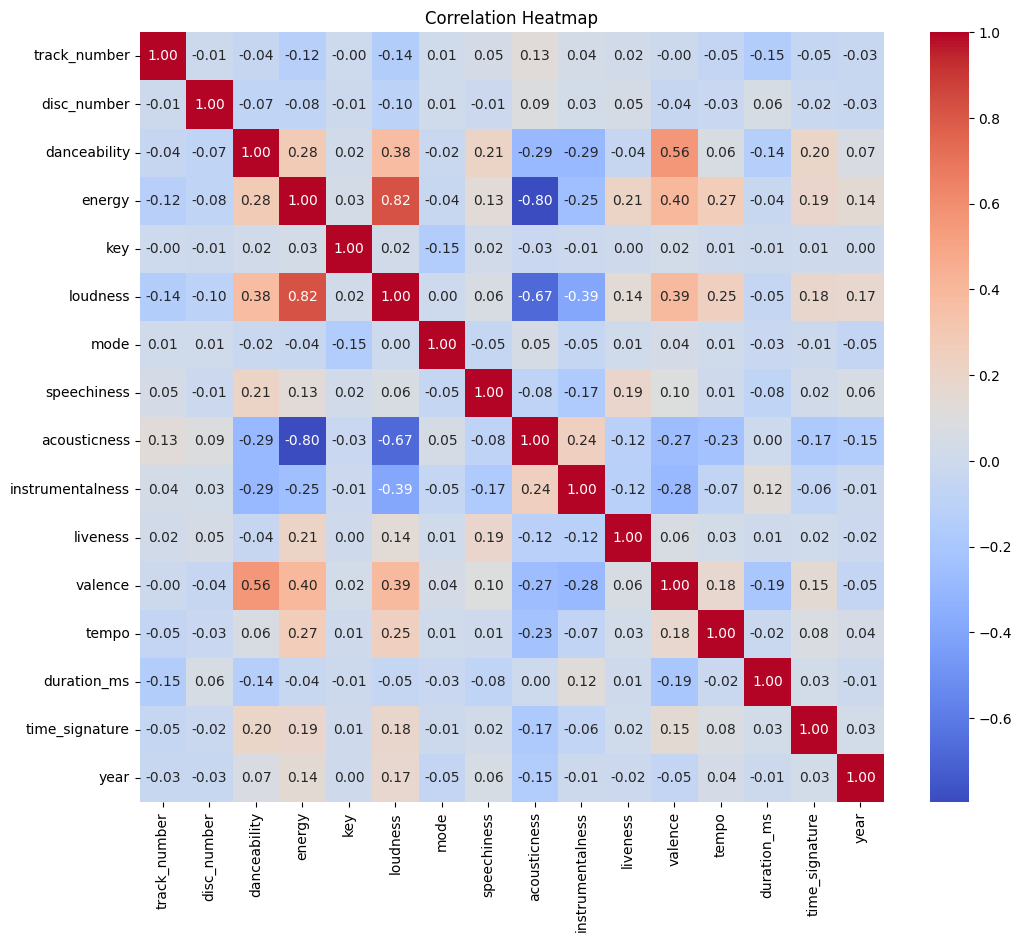

In [3]:
# Filter out non-numeric columns before correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Replace infinite values with NaN
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Correlation heatmap
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

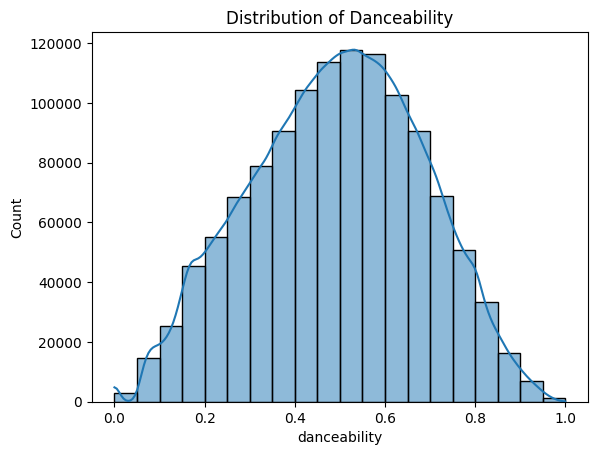

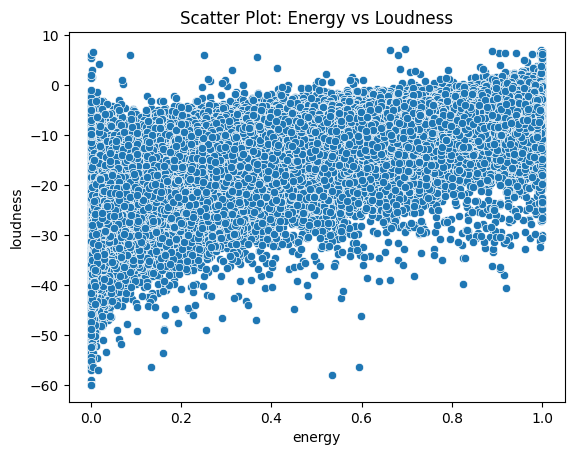

In [4]:
#
# Distribution of danceability
sns.histplot(df['danceability'], bins=20, kde=True)
plt.title('Distribution of Danceability')
plt.show()

# Scatter plot between energy and loudness
sns.scatterplot(x='energy', y='loudness', data=df)
plt.title('Scatter Plot: Energy vs Loudness')
plt.show()

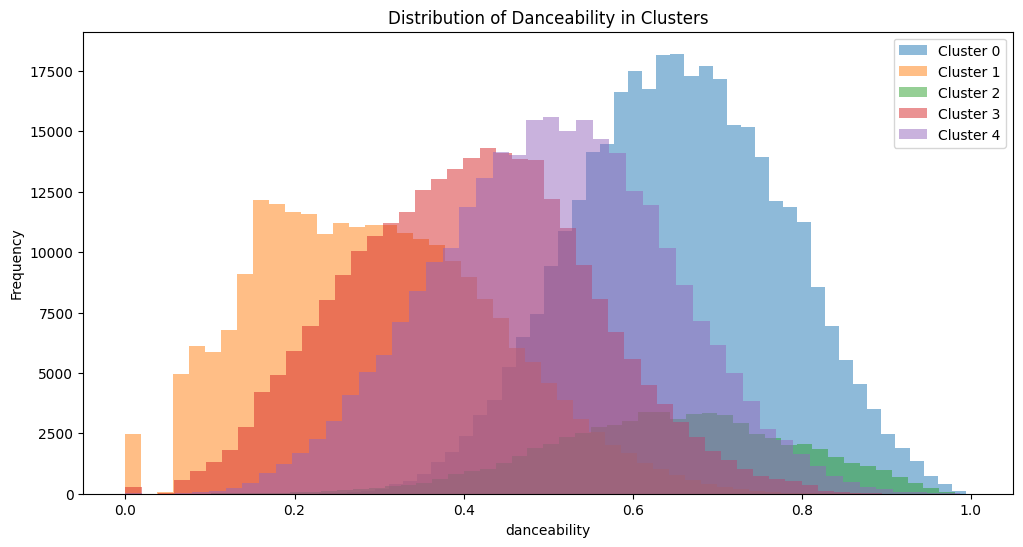

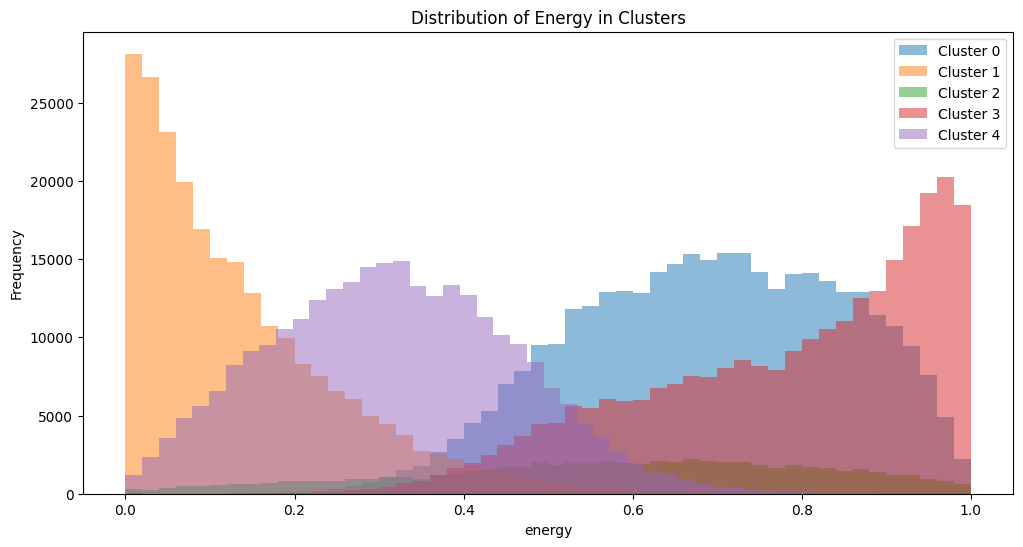

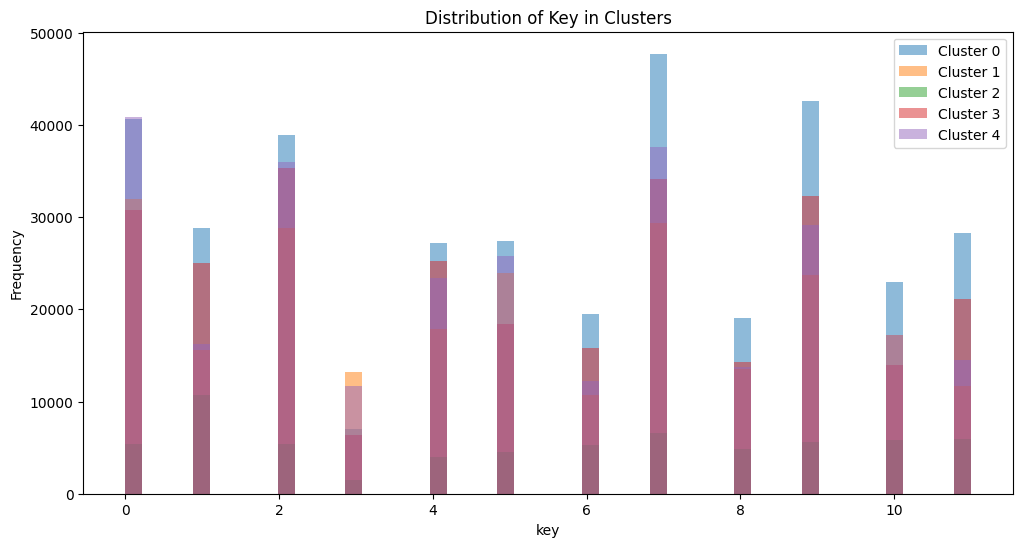

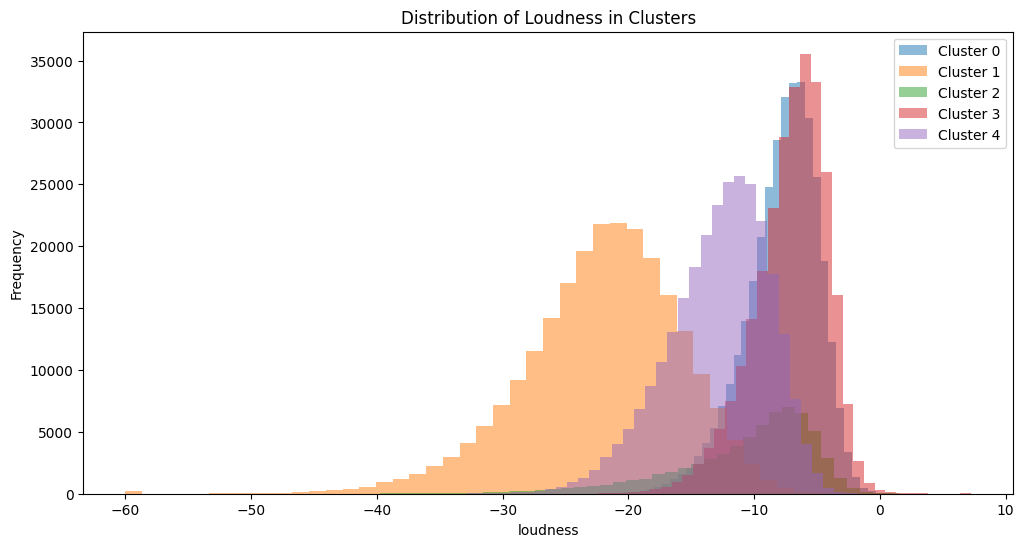

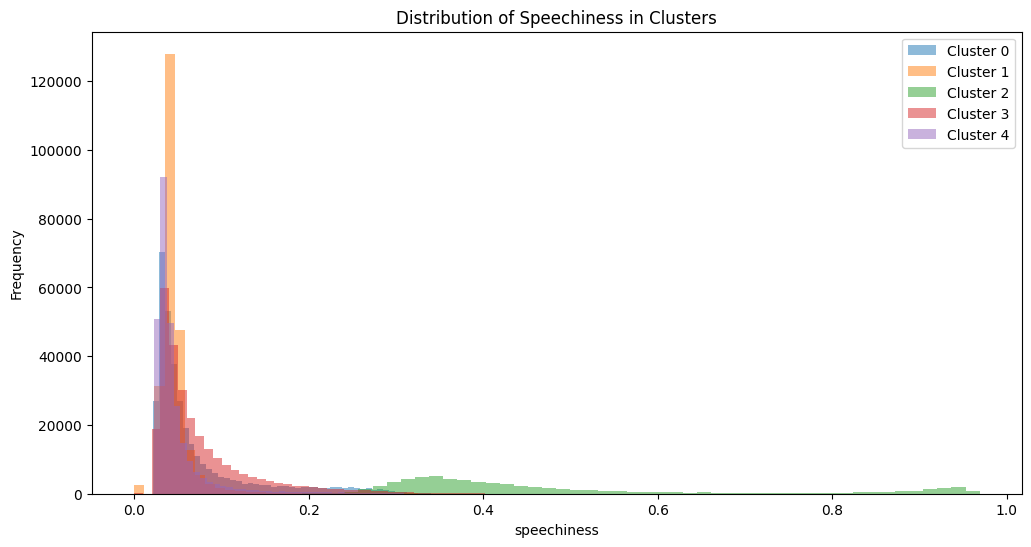

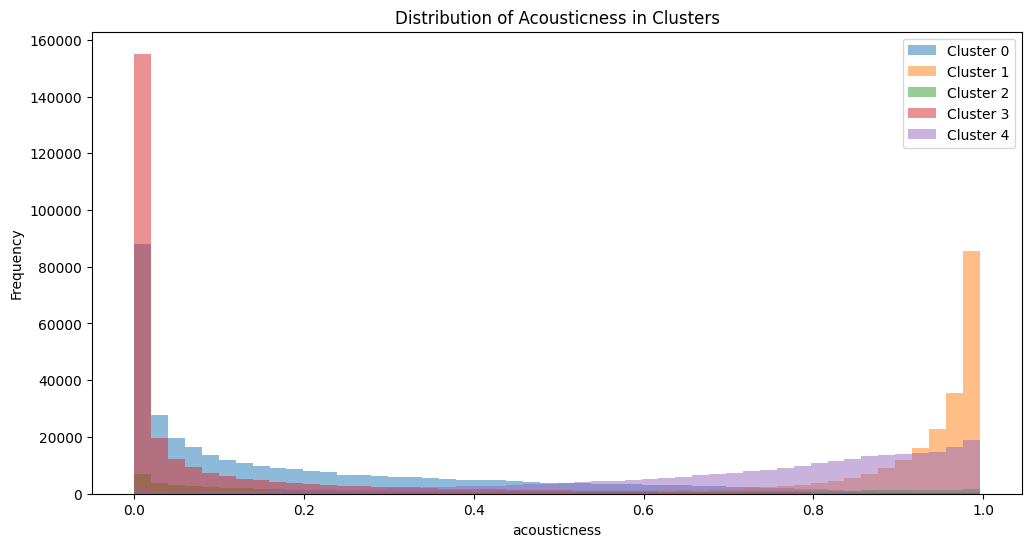

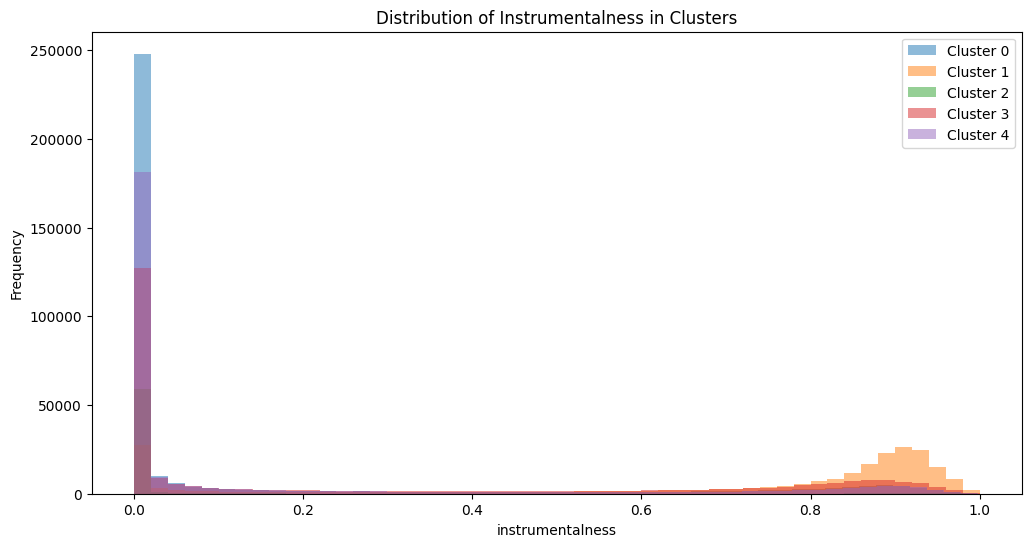

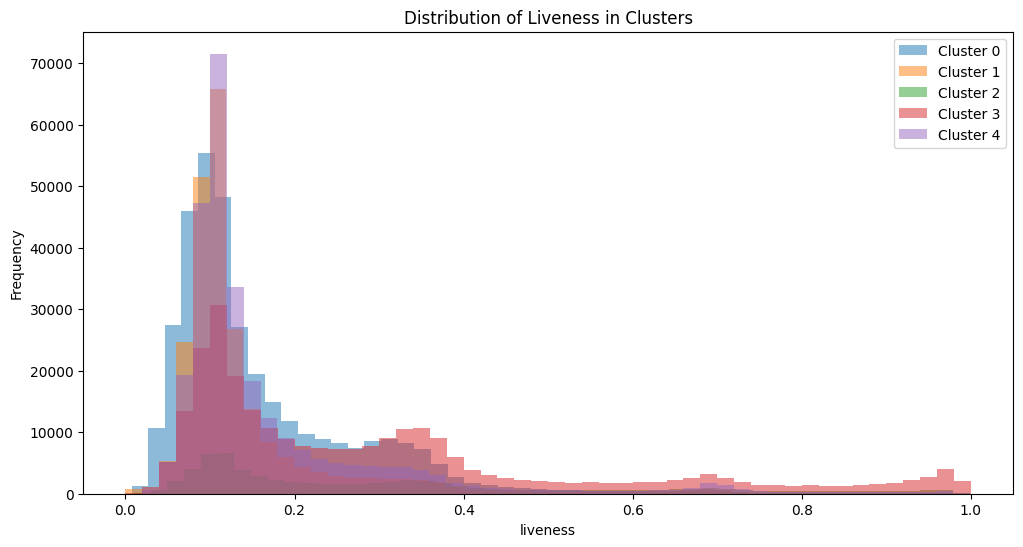

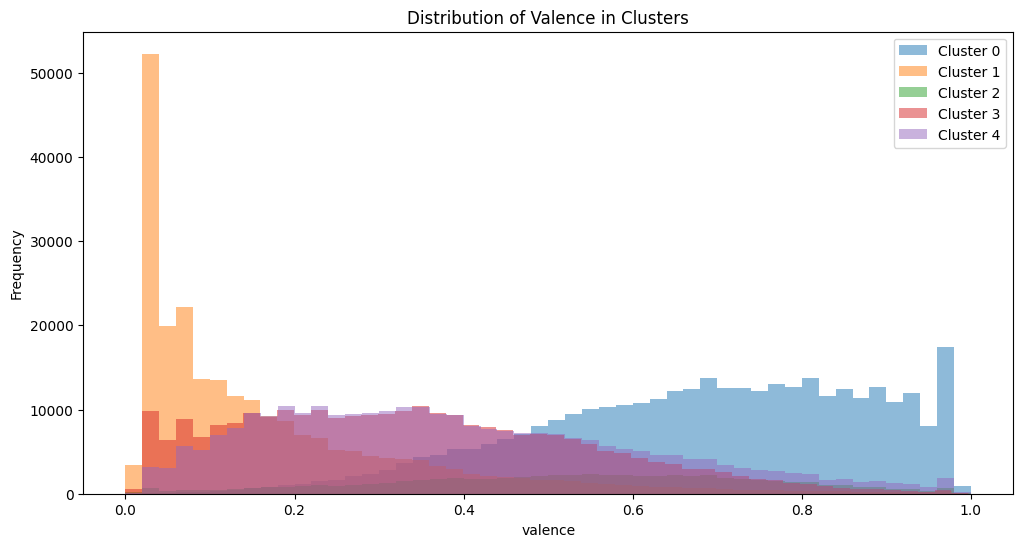

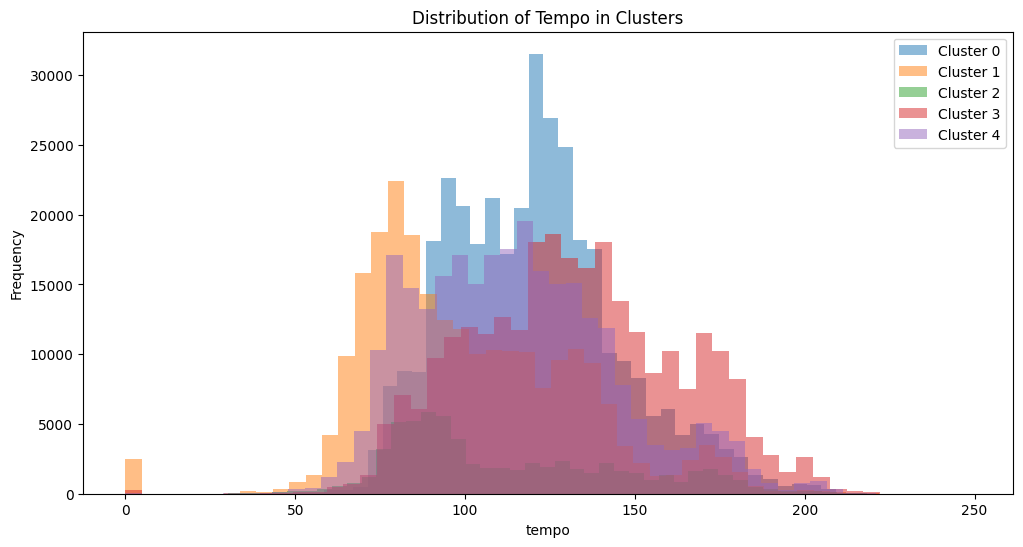

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
dft = pd.read_csv(datasetPath)

# Select key features for clustering
key_features_interesting = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Extract the selected features
X = dft[key_features_interesting]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (you may need to choose an appropriate value)
num_clusters = 5

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # any value you prefer
dft['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (you may need to adjust for the number of features)
for feature in key_features_interesting:
    plt.figure(figsize=(12, 6))
    for cluster in range(num_clusters):
        cluster_data = dft[dft['cluster'] == cluster]
        plt.hist(cluster_data[feature], bins=50, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {str(feature).capitalize()} in Clusters')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Main Solution ML Unsupervised Learning
# Recommendation system content-based filtering
- ## **start running after** this

In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import joblib
import time

# Define file path and sample size
if (using_local_dataset):
    file_path = datasetPath
else:
    file_path = '/kaggle/input/spotify-12m-songs/tracks_features.csv'


# Function to sample a subset of the dataset
def get_sample_dataset(file_path, sample_size_needed):
    return pd.read_csv(file_path).sample(n=sample_size_needed, random_state=42)


# Data sampling and Dropping duplicates

In [7]:
# performancing process time in unix time standart
START_TIME = time.time()

sample_size = 10000  # Define the size of the sample

# Load a sample of the dataset
print("get sample dataset\n")
songs_df = get_sample_dataset(file_path, sample_size)

print("> drop duplicates")
songs_df.drop_duplicates(inplace=True)
print("* drop duplicates finish")

get sample dataset

> drop duplicates
* drop duplicates finish


# Handling missing values
##### base on all 24 key features

In [8]:
key_features = [
    'id', "name", "album", "album_id", "artists", "artist_ids",
    "track_number",'disc_number','explicit','danceability','energy','key',
    'loudness','mode','speechiness','acousticness','instrumentalness','liveness',
    'valence','tempo','duration_ms','time_signature','year','release_date'
]

print("> drop n/a ")
songs_df = songs_df.dropna(subset=key_features)
print("* drop n/a finish")

> drop n/a 
* drop n/a finish


# Feature selection and Combination

In [9]:
row_count = songs_df.shape[0]
print(f"After data cleansing, there are still {row_count} records in the dataset.")

# Define desired columns to use for content-based recommendation
features = [
    'name', 'artists', 'danceability', 'energy', 
    'loudness', 'tempo', 'duration_ms', 'release_date',
    'acousticness', 'speechiness'
]

# Combine selected features into a single string
songs_df['combined_features'] = songs_df[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)



After data cleansing, there are still 10000 records in the dataset.


# TF-IDF Vectorization and Cosine Similaraty calculation
* ##### performs TF-IDF vectorization on the combined features
* ##### computes the cosine similarity matrix.

In [10]:

# TF-IDF Vectorization
print("> TF-IDF vectorizing")
tfidf = TfidfVectorizer(stop_words='english')
print("\n> TF-IDF fitting")
tfidf_matrix = tfidf.fit_transform(songs_df['combined_features'])
print("* Finish fitting\n")

# Compute the cosine similarity matrix
print("> Cosine_sim computing")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("* Cosine_sim finish\n")


> TF-IDF vectorizing

> TF-IDF fitting
* Finish fitting

> Cosine_sim computing
* Cosine_sim finish



### Time performance

In [11]:
END_TRAIN_TIME = time.time()

# calc duration train seconds 
TRAIN_TIME = round(END_TRAIN_TIME - START_TIME, 4)

print(f"Train {row_count} records\nWith trianed time = {TRAIN_TIME} seconds")

Train 10000 records
With trianed time = 10.773 seconds


# Save trained model to disk

In [ ]:

# Save the trained model to disk
print("> dumping tfidf")
joblib.dump(tfidf, 'tfidf_model.pkl')
print("> dumping cosine_sim")
joblib.dump(cosine_sim, 'cosine_sim_model.pkl')
print("* dumping cosine_sim finish\n")

In [12]:
def get_recommendations(song_name, songs_df=songs_df, cosine_sim=cosine_sim, lastTop=5):
    # Check if the song name exists in the dataset
    if song_name not in songs_df['name'].values:
        return "Song not found in the dataset."
    
    # Get the index of the song that matches the name in the full dataset
    full_dataset_idx = songs_df[songs_df['name'] == song_name].index[0]
    
    # Get the corresponding index in the sampled dataset
    sampled_dataset_idx = songs_df.index.get_loc(full_dataset_idx)
    
    # Get the pairwise similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[sampled_dataset_idx]))
    
    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N most similar songs
    sim_scores = sim_scores[1:1+lastTop]
    
    # Get the song indices
    song_indices = [i[0] for i in sim_scores]
    
    # Return the top N most similar songs
    return songs_df['name'].iloc[song_indices]

# Dhong boi
def get_recommended_movie(movie_name: str) -> list:
    df['distances'] = cosine_similarity (vector, vector [index]) # Here I assume

    n = 10 # or however many you want
    n_largest = df ['distances'].nlargest (n + 1)

    data = []
    i = 0

    for k, v in n_largest.items():
        movie_data = df.loc [df.index == k]

        data.append({
            'title': (movie_data['title'].values) [0],
            'genres': (movie_data['genres'].values) [0],
            'overview': (movie_data['overview'].values) [0],
            'similarScore': f' {round (v, 2)}%'
        })
    return data [1::]

# Utilize ML App 

In [13]:
import random
# Example usage:
print(songs_df['name'])

devMode = False

if (devMode):
    input_song = input("\nEnter your song\n>")
    if input_song.strip() == "":
        rnd = random.randrange(0, sample_size-1)
        # Default song name if no input provided by random index
        input_song = songs_df.iloc[rnd]['name'] 
else:
    rnd = random.randrange(0, sample_size-1)
    # Default song name if no input provided by random index
    input_song = songs_df.iloc[rnd]['name'] 
    
print(f"You selected \"{input_song}\" song")
lastTop = 5

START_APP_TIME = time.time()
recommendations = get_recommendations(input_song,lastTop=lastTop)
END_APP_TIME = time.time()
# Seconds duration
APP_TIME = round(END_APP_TIME - START_APP_TIME, 6)

print(f"[Top {lastTop}] Recommended songs for \"{input_song}\": \n")
print(recommendations)
print(f"processing in {APP_TIME} seconds")

54449                           Smokin' Sticky Sticky
127106                         Holding Back the Years
11213          All Along The Watchtower - Live - 1991
369031                                      Windmills
544989                                 Overnite Flite
                              ...                    
59781                              Como Ama Una Mujer
978577                                     Seven Seas
627296                                          Never
1113481    Give It Up (Turn It Loose) - Disco Version
438555                   Turning Ever Towards the Sun
Name: name, Length: 10000, dtype: object
You selected "Walk Away" song
[Top 5] Recommended songs for "Walk Away": 

157309           Walk Away
314748            Don't Go
624212            Too Many
1052961    Don't Walk Away
70680            Walk Away
Name: name, dtype: object
processing in 0.014002 seconds
